 ### Exploratory Data Analysis of the Barcelona Population Dataset
 
The data file 'population.csv' is Kaggle, but originally sourced from the Open Data BCN portal. The data contains information about Barcelona's population for the years 2013-2017, including its distribution by age, gender, neighbourhood and district. We will analyse how the total population in Barcelona changed during these years, what the population is for different neighbourhoods and districts, and what the proportions are for the male and female population for different areas. 
 

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('population.csv')
df.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [104]:
print(f'File \'population_csv\' data have {df.shape[0]} rows and {df.shape[1]} columns.')

File 'population_csv' data have 70080 rows and 8 columns.


In [105]:
df.columns

Index(['Year', 'District.Code', 'District.Name', 'Neighborhood.Code',
       'Neighborhood.Name', 'Gender', 'Age', 'Number'],
      dtype='object')

In [106]:
# number of unique values in each feature
for col in df.columns.values:
    print(f'number of unique values in {col} : {df[col].nunique()}')

number of unique values in Year : 5
number of unique values in District.Code : 10
number of unique values in District.Name : 10
number of unique values in Neighborhood.Code : 73
number of unique values in Neighborhood.Name : 73
number of unique values in Gender : 2
number of unique values in Age : 20
number of unique values in Number : 630


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               70080 non-null  int64 
 1   District.Code      70080 non-null  int64 
 2   District.Name      70080 non-null  object
 3   Neighborhood.Code  70080 non-null  int64 
 4   Neighborhood.Name  70080 non-null  object
 5   Gender             70080 non-null  object
 6   Age                70080 non-null  object
 7   Number             70080 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


Now find and remove duplicated values. 

In [108]:
if len(df[df.duplicated()]) > 0:
    print("Number of duplicated entries: ", len(df[df.duplicated()]))
else:
    print("No duplicated entries found")

Number of duplicated entries:  4277


In [109]:
# remove duplicated rows
df.drop_duplicates(inplace = True)

There are no missing values in the dataset:

In [110]:
# check missing values
print(f'Missing values in the dataframe:\n{df.isnull().sum()}')

Missing values in the dataframe:
Year                 0
District.Code        0
District.Name        0
Neighborhood.Code    0
Neighborhood.Name    0
Gender               0
Age                  0
Number               0
dtype: int64


### Visualizations and analysis

Let's consider the total population of Barcelona changes from 2013 to 2017.


In [111]:
# population changes over the years
sub_df = df.groupby(['Year'])['Number'].sum()
print(f'Total population by year:\n{sub_df}')

Total population by year:
Year
2013    1552211
2014    1547083
2015    1546923
2016    1552363
2017    1564314
Name: Number, dtype: int64


<AxesSubplot:title={'center':'Barcelona population years 2013-2017'}, xlabel='Year', ylabel='Population'>

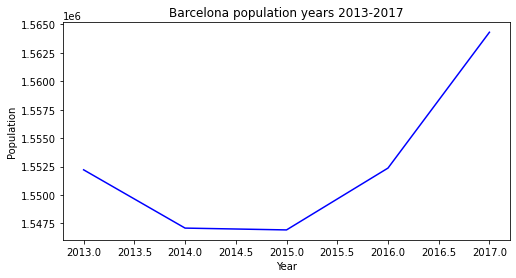

In [112]:
plt.rcParams["figure.figsize"] = (8,4)
plt.title("Barcelona population years 2013-2017")
plt.ylabel("Population")

sub_df.plot(x='Year', color='blue')


There was a drop in population numbers during year 2013 and values stayed almost the same (minor decline) during 2014. There has been a steady grows starting from 2015.

Gender  Female  Male
Year                
2013      6613  6525
2014      6606  6537
2015      6583  6549
2016      6607  6570
2017      6630  6583


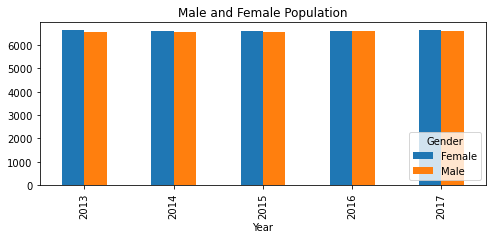

In [113]:
sub_df = df.groupby(['Year', 'Gender']).size().unstack()
print(sub_df)
sub_df.plot(kind='bar',title='Male and Female Population', figsize=(8, 3)) 
plt.legend(loc='lower right', title='Gender')

As can be observed from the graph above, the male-to-female ratio remains approximately the same over the course of the five years.

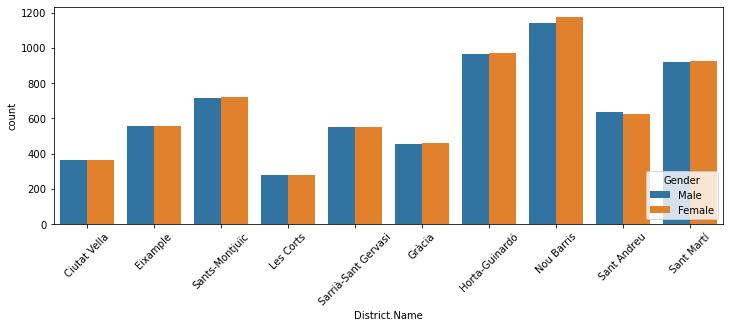

In [114]:
# how the male:female population distribution in diffrerent districts for last year 2017 
df_2017 = df[df['Year']==2017]
fig = plt.figure(figsize=(12,4))
plt.xticks(rotation=45)
sns.countplot(data=df_2017,x='District.Name',hue='Gender')
plt.legend(loc='lower right', title='Gender')

For the year 2017, all districts except Nou Barris have very similar number of males and females. In the Nou Barris district, the female population was slightly (by 1.6%) higher than the male population. 

Compare the age distribution between different years.

In [143]:
df.Age.unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '>=95'], dtype=object)

In [149]:
sub_df = df.groupby(['Year','Age'])['Number'].sum().unstack()
sub_df

Age,0-4,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,5-9,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,>=95
Year,,,,,,,,,,,,,,,,,,,,
2013,65869,57984,60339,76649,108223,133320,136689,122278,114172,64169,103594,92887,88045,82566,64555,66707,57789,37180,14945,4251
2014,65204,59971,59781,73818,102786,127654,137108,123129,112457,64911,105429,94538,86142,85744,68148,63821,58839,37352,15763,4488
2015,66041,61260,60328,72155,100217,124434,135617,125414,113022,64886,106929,97148,84352,85662,72658,59105,57704,38228,17012,4751
2016,65296,62198,61380,74925,99045,120034,133092,126954,114093,65264,107054,98190,86797,83631,74034,60677,57545,39502,17612,5040
2017,65750,64067,63048,76615,104091,118027,129793,129845,114054,66462,109291,98304,87928,82790,75444,58503,56713,39975,18199,5415


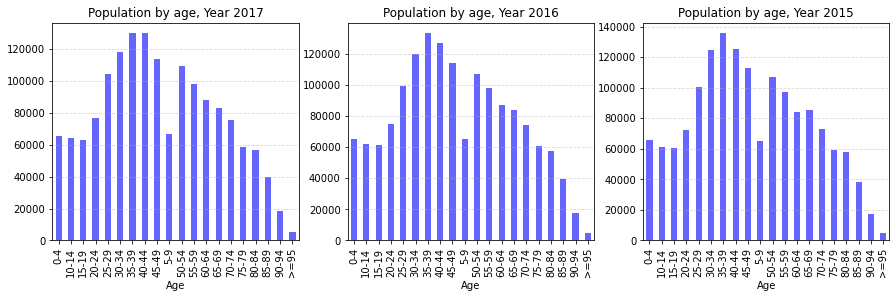

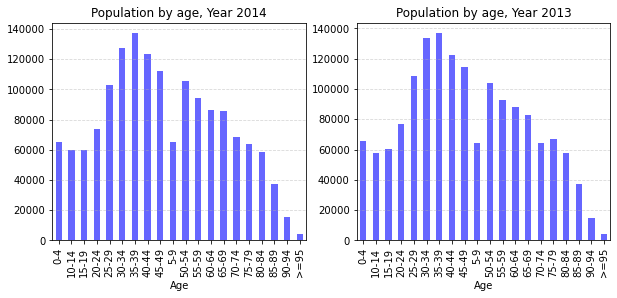

In [150]:
age_2017 = df[df['Year']==2017].groupby(['Age'])['Number'].sum()
age_2016 = df[df['Year']==2016].groupby(['Age'])['Number'].sum()
age_2015 = df[df['Year']==2015].groupby(['Age'])['Number'].sum()
age_2014 = df[df['Year']==2014].groupby(['Age'])['Number'].sum()
age_2013 = df[df['Year']==2013].groupby(['Age'])['Number'].sum()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
age_2017.plot(kind='bar', color='blue', alpha=0.6, title='Population by age, Year 2017', ax=ax1)
ax1.grid(linestyle='--', alpha=0.5, axis='y')
age_2016.plot(kind='bar', color='blue', alpha=0.6, title='Population by age, Year 2016', ax=ax2)
ax2.grid(linestyle='--', alpha=0.5, axis='y')
age_2015.plot(kind='bar', color='blue', alpha=0.6, title='Population by age, Year 2015', ax=ax3)
plt.grid(linestyle='--', alpha=0.5, axis='y')

fig, (ax4, ax5) = plt.subplots(1,2, figsize=(10,4))
age_2014.plot(kind='bar', color='blue', alpha=0.6, title='Population by age, Year 2014', ax=ax4)
ax4.grid(linestyle='--', alpha=0.5, axis='y')
age_2013.plot(kind='bar', color='blue', alpha=0.6, title='Population by age, Year 2013', ax=ax5)
ax5.grid(linestyle='--', alpha=0.5, axis='y')

As can be observed from the images above, in 2017 there were fewer people in the age group 30-40 compared to previous years. The number of children and young people aged 5-19 was larger in 2017 and has been increasing since 2015. The number of people in the age group 75-79 decreased, and the number of people older than 85 was greater.

In [153]:
sub_df = df.groupby(['Year','District.Name'])['Number'].sum().unstack()
sub_df

District.Name,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
Year,,,,,,,,,,
2013,99740,258746,115729,159991,79508,156592,141613,223699,176630,139963
2014,97710,259767,116595,159949,78451,155325,140294,224985,174306,139701
2015,97031,258772,116220,158601,78120,155378,141579,225801,174140,141281
2016,96446,258364,117276,160915,79075,156486,140703,225931,174546,142621
2017,98232,258152,117227,161921,79888,159214,143246,227989,174478,143967


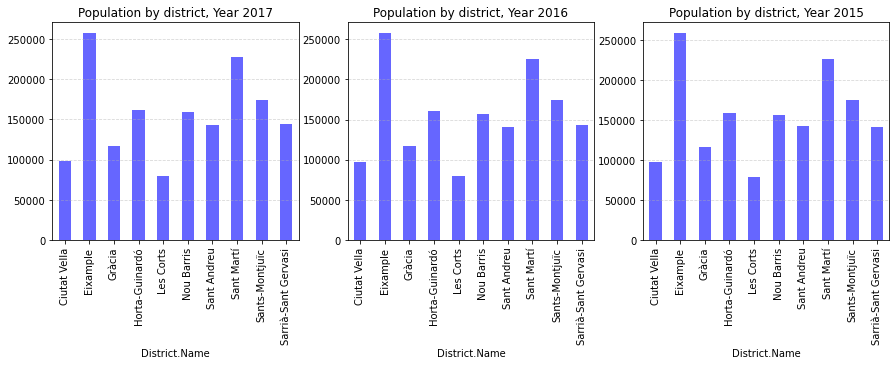

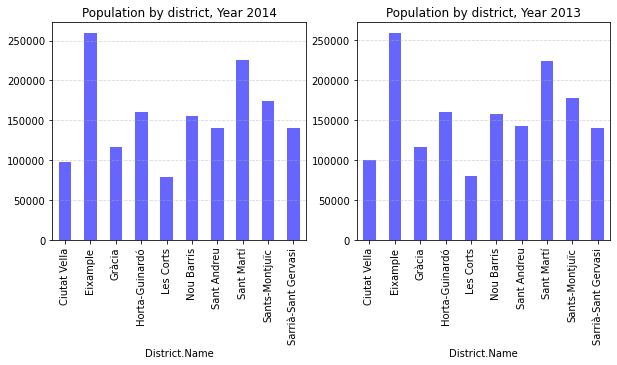

In [142]:
data_2017 = df[df['Year']==2017].groupby(['District.Name'])['Number'].sum()
data_2016 = df[df['Year']==2016].groupby(['District.Name'])['Number'].sum()
data_2015 = df[df['Year']==2015].groupby(['District.Name'])['Number'].sum()
data_2014 = df[df['Year']==2014].groupby(['District.Name'])['Number'].sum()
data_2013 = df[df['Year']==2013].groupby(['District.Name'])['Number'].sum()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
data_2017.plot(kind='bar', color='blue', alpha=0.6, title='Population by district, Year 2017', ax=ax1)
ax1.grid(linestyle='--', alpha=0.5, axis='y')
data_2016.plot(kind='bar', color='blue', alpha=0.6, title='Population by district, Year 2016', ax=ax2)
ax2.grid(linestyle='--', alpha=0.5, axis='y')
data_2015.plot(kind='bar', color='blue', alpha=0.6, title='Population by district, Year 2015', ax=ax3)
plt.grid(linestyle='--', alpha=0.5, axis='y')

fig, (ax4, ax5) = plt.subplots(1,2, figsize=(10,4))
data_2014.plot(kind='bar', color='blue', alpha=0.6, title='Population by district, Year 2014', ax=ax4)
ax4.grid(linestyle='--', alpha=0.5, axis='y')
data_2013.plot(kind='bar', color='blue', alpha=0.6, title='Population by district, Year 2013', ax=ax5)
ax5.grid(linestyle='--', alpha=0.5, axis='y')

Population distribution among district stays the same. Eixample, Sant Martí, Sants-Montjuïc are the most populated districts followed by Horta-Guinardó, Nou Barris and Sant Andreu. Les Corts has smallest population that is only 30% of Eixample population.

##### Conclusion:
  During the years 2013-2017 there were no significant changes in Barcelona's population. The proportion of male and female populations were almost the same, with the number of women slightly larger. Geographically, the population distribution did not change: Eixample, Sant Martí, Sants-Montjuïc were the most populated areas and Les Corts was the least populated area.